# Solución de Ecuaciones Diferenciales 

### Misión Red Bull Stratos 

###### Juan Pablo Ruíz, Rafael Hernández, Bryan Juárez

## Objetivo General

- Simular el salto supersónico de Baumgartner

## Objetivos específicos
* Plantear el modelo que describa el salto supersónico
* Resolver las ecuaciones diferenciales de rozamiento aerodinámico
* Graficar la caída y la velocidad máxima alcanzada
* Comparar la velocidad máxima alcanzada con la velocidad del sonido


## Introducción

Ecuación de Caída Libre con factor de Rozamiento Aerodinámico:
- $ m \frac{d^2 y}{d t^2} = -m g + D $

Expreión Factor de Rozamiento Aerodinámico:
- $ D = \frac{1}{2} \rho v^2 C_D A $

- Sean:
 * $ \rho $ : Densidad del Fluido
 * $v$ : Velocidad del Cuerpo
 * $C_D$ : Coeficiente de Rozamiento
 * $A$ : Área de Referencia
 

Se despeja para obtener la función:
- $ \frac{d^2 y}{d t^2} = -g + \frac{\rho (y) v(t)^2 C_D A}{2m} $

$ \rho $ está en función de la altura, debido a que la densidad del aire no es la misma a lo largo de toda la atmósfera, para esto se empleó la librería `AeroCalc`. 

El modelo obtenido es de segundo orden, por lo que se tiene que transformar a uno de primer orden. Para ello, se define la variable $v=\frac{dy}{dt}$

Y el sistema queda:
$\frac{d}{dt}\begin{pmatrix} y \\ v \end{pmatrix}=\begin{pmatrix} v \\ -g-\frac{1}{2m}p(y){v^2}{C_D}A\end{pmatrix}$

In [6]:
# Importames las librerias
# Para importar la libreria AeroCalc, en anaconda prompt -->pip install aero-calc==0.13.2

import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
import numpy as np
from scipy.integrate import odeint
from aerocalc import std_atm   

In [7]:
def f(y, t0, rho, masa, Coefroz, area): 
    g = 9.8 
    return np.array([y[1],-g + rho(y[0]) * y[1] ** 2 * Coefroz * area / (2 * masa)])

h0 = 39000.0
Coefroz = 0.4
area = 1.0  
masa = 80  

def air(y):
    return std_atm.alt2density(y, alt_units='m', density_units='kg/m**3')

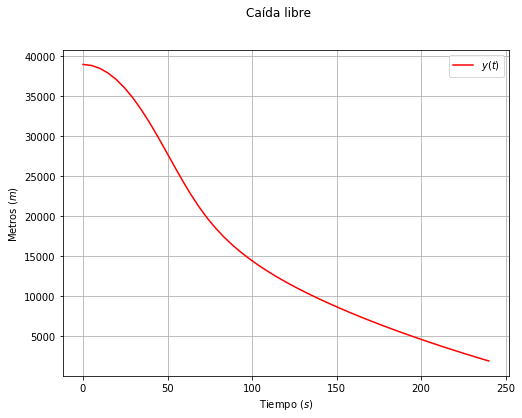

In [10]:
t = np.linspace(0,240)
y0 = np.array([h0, 0])
sol = odeint(f, y0, t, args=(air, masa, Coefroz, area))
y = sol[:, 0]
v = sol[:, 1]

plt.figure(figsize=(8,6))
plt.suptitle("Caída libre")
plt.plot(t, y, 'r',  label='$y(t)$')
plt.xlabel('Tiempo ($s$)')
plt.ylabel('Metros ($m$)')
plt.legend(loc='best')
plt.grid()
plt.show()

La gráfica muestra al posición del saltador en función del tiempo. Se muesra ina inflexión en la gráfica debido a la variación de densidad en el aire al momento de la caida.

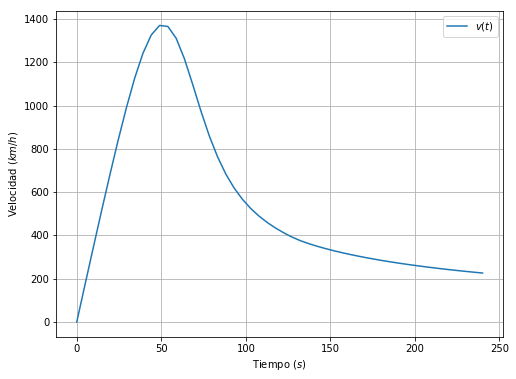

In [17]:
plt.figure(figsize=(8,6))
plt.plot(t, -v*3.6, label='$v(t)$')
plt.ylabel('Velocidad ($km/h$)')
plt.xlabel('Tiempo ($s$)')
plt.legend(loc='best')
plt.grid()
plt.show()

La velocidad del saltador va en aumento conforme cae. Sin embargo, como la densidad del aire no es uniforme, cuando este es más denso, la velocidad comienza a disminuir.

## Comprobación De La Ruptura De La Barrera Del Sonido

Para comprobar si Baumgartner superó la barrera del sonido. Podemos comparar los números de Mach de la velocidad del sonido en el aire $M=\frac{u}{c}$ donde $u$ es la velocidad y $c=\sqrt{{\gamma}{RT}}$, $\gamma$ y $R$ son la razón de calores específicos y la constante específica del aire. Se compara el número Mach debido a que la velocidad real del aire no es constante, debido a la temperatura.

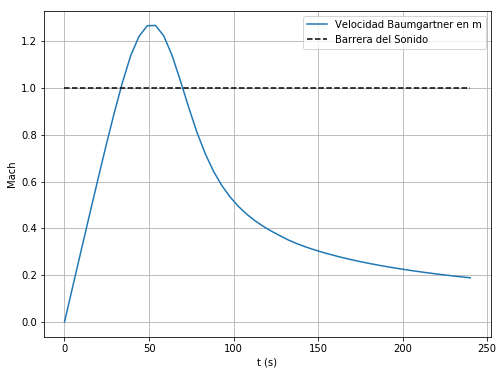

In [19]:
cda= 1.4 #Coeficiente de dilatación adiabática
R = 287.0 # Constante del aire como gas ideal en (N*m)/ kg* K^-1
c = np.empty_like(v)
for i in range(len(v)):
    c[i] = np.sqrt(cda * R * std_atm.alt2temp(y[i], alt_units='m', temp_units='K'))
M = -v / c

plt.figure(figsize=(8,6))
plt.plot(t, M,label='Velocidad Baumgartner en m')
plt.plot(t, np.ones_like(t), 'k--',label='Barrera del Sonido')
plt.legend(loc='best')
plt.ylabel('Mach')
plt.xlabel('t (s)')
plt.grid()

El saltador rompió la barrera del sonido cuando su velocidad fue máxima.

## Conclusiones
- Se realizó un modelo matemático para describir la situación del salto, el cual pudo ser resuelto en python para obtener las gráficas que muestran la caída del hombre, así como su velocidad durante todo el trayecto. Se comparó la velocidad del sonido con la del saltador y se obtuvo que fue posible romper la barrera del sonido.

- La simulación realizada tiene buen factor de confianza debido a que se aproxima muy bien al valor de velocidad máxima real alcanzado e cuál fué 1,357.64 km/h